# Geometry3D package Tutorial

In [2]:
from Geometry3D import *

## Example 1

In [3]:
shape_1 = Cylinder(circle_center = Point(4 ,5, 10),
                      radius        = 20,
                      height_vector = 20 * x_unit_vector(),
                      n             = 15)

shape_2 = Sphere(center = Point(25,10,-1),
                 radius = 10,
                 n1 = 20,
                 n2 = 20)

Get geometry type

In [5]:
type(shape_2)

Geometry3D.geometry.polyhedron.ConvexPolyhedron

Get geometry volume and area

In [26]:
print('object volume: ', shape_1.volume())

object volume:  24404.19858454802


In [27]:
print('object area: ', shape_1.area())

object area:  4935.360148267913


Plot geometries

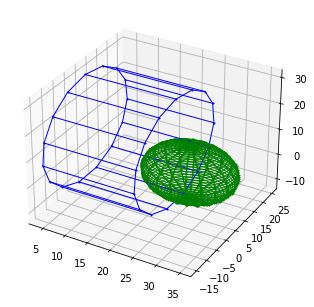

In [28]:
r = Renderer()

r.add((shape_2,'g',1))
r.add((shape_1,'b',1))


r.show()

Calculate intersection between 2 geometries

In [30]:
shapes_intersect = intersection(shape_1, shape_2)
print(shapes_intersect.volume())

1670.621670429911


Plot intersection

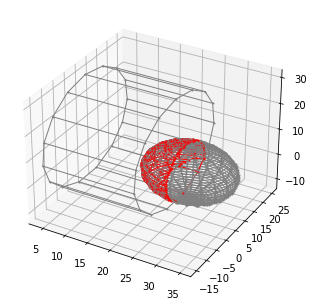

In [31]:
r = Renderer()

r.add((shape_2,'grey',1))
r.add((shape_1,'grey',1))
r.add((shapes_intersect,'red',1))


r.show()

## Example 2

In [56]:
point1 = Point(-5,10,30)
point2 = Point(31,8,5)

segment = Segment(point1, point2)


cone = Cone(circle_center = Point(15, 7, -1),
            radius = 10 ,
            height_vector = 20 * Vector(0, 0, 5),
            n=20)

segment length:  43.87482193696061


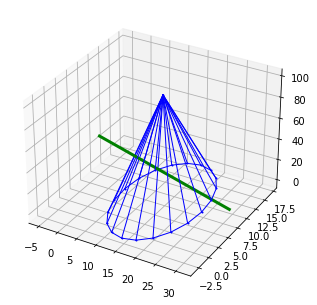

In [57]:
r = Renderer()
r.add((segment,'g',3))
r.add((cone,'b',1))
r.show()

Intersection length: 19.594819888802867


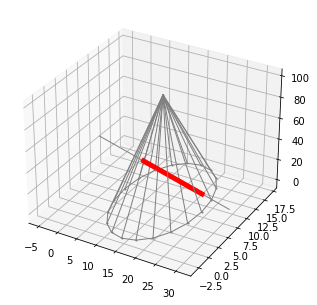

In [61]:
shapes_intersect_2 = intersection(segment, cone)
print('Intersection length:', shapes_intersect_2.length())

r = Renderer()

r.add((cone,'grey',1))
r.add((segment,'grey',1))
r.add((shapes_intersect_2,'red', 5))


r.show()

## Convert to GeoDataFrame

In [67]:
def to_GeoDataFrame(geometry,  geometry_name:str, crs:int):
    '''Saving a Geometry3D object to GeoPandas GeoDataFrame'''
    
    import geopandas as gpd
    
    if isinstance(geometry, Point):
        from shapely.geometry import Point as shapely_Point
        gdf_geometry = [shapely_Point(geometry[0:])]
            
    elif isinstance(geometry, Segment):
        from shapely.geometry import LineString as shapely_LineString
        gdf_geometry = [shapely_LineString([geometry[0][0:],
                                            geometry[-1][0:]])]
    
    # data dictionary
    gdf_dict = {'Name' : '{}'.format(geometry_name),
                'geometry' : gdf_geometry}
    
    
    return gpd.GeoDataFrame(data=gdf_dict, crs=crs, geometry='geometry')

In [68]:
intersect_gdf = to_GeoDataFrame(shapes_intersect_2, 'intersect of cone-segment', crs=2039)
intersect_gdf

,Name,geometry
0,intersect of cone-segment,"LINESTRING Z (7.590 9.301 21.257, 23.668 8.407..."


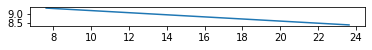

In [72]:
intersect_gdf.plot()